# Overview

1. Convert Business Problem to Data Science Problem
2. Load Data
3. Understand the Data
4. Data Preprocessing
5. Exploratory Data Analysis
6. Model Building
7. Predictions and Evaluations
8. Handle Class Imbalance
9. Hyperparameter Tuning

## 1. Import Libraries

In [1]:
import numpy as np 
import pandas as pd
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

## 2. Load Data

In [4]:
df = pd.read_csv("loan_data.csv")

## 3. Understanding the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
df.describe()  

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [7]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [8]:
num_col = df.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = df.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')
Categorical columns: 
 Index(['purpose'], dtype='object')


## 4. Data Pre-processing

In [9]:
# Let's do one hot encoding for the column `purpose` as model would be expecting numeric features

df = pd.get_dummies(prefix='purpose',data=df,columns=['purpose'])

In [10]:
num_col = df.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = df.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_all_other', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business'],
      dtype='object')
Categorical columns: 
 Index([], dtype='object')


In [11]:
print(df.isna().sum())
print(df.shape)

credit.policy                 0
int.rate                      0
installment                   0
log.annual.inc                0
dti                           0
fico                          0
days.with.cr.line             0
revol.bal                     0
revol.util                    0
inq.last.6mths                0
delinq.2yrs                   0
pub.rec                       0
not.fully.paid                0
purpose_all_other             0
purpose_credit_card           0
purpose_debt_consolidation    0
purpose_educational           0
purpose_home_improvement      0
purpose_major_purchase        0
purpose_small_business        0
dtype: int64
(9578, 20)


## 5. Exploratory Data Analysis

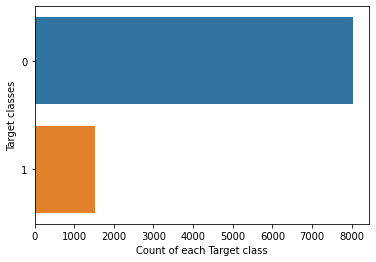

In [12]:
# Check the distribution of y variable to see if it's a case of unbalanced class

sns.countplot(y=df['not.fully.paid'] ,data=df)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

C:\Users\kaart\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\kaart\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\kaart\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\kaart\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWar

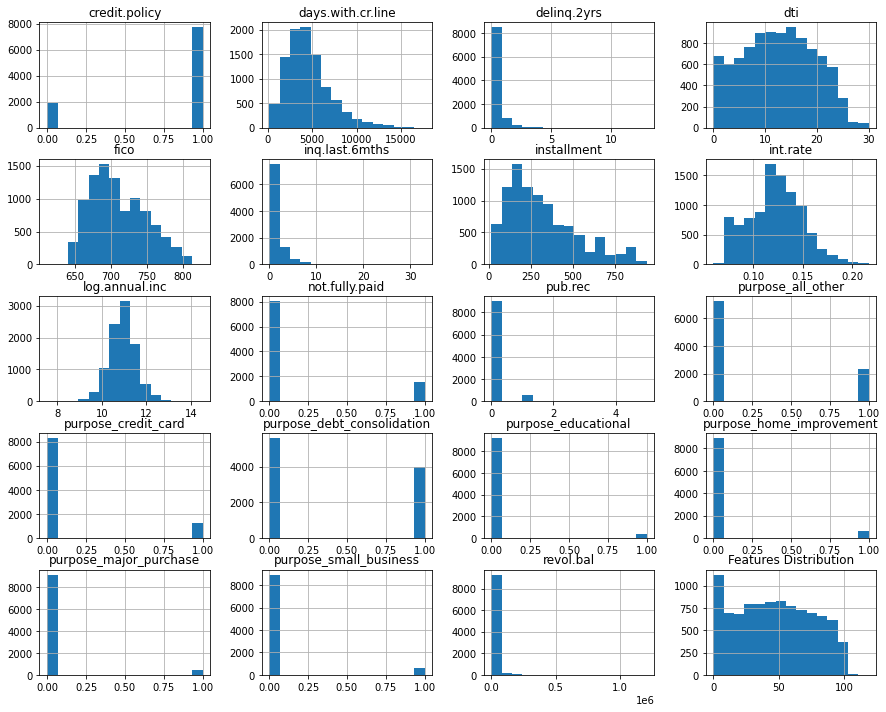

In [13]:
# Check the distribution of all the features

df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

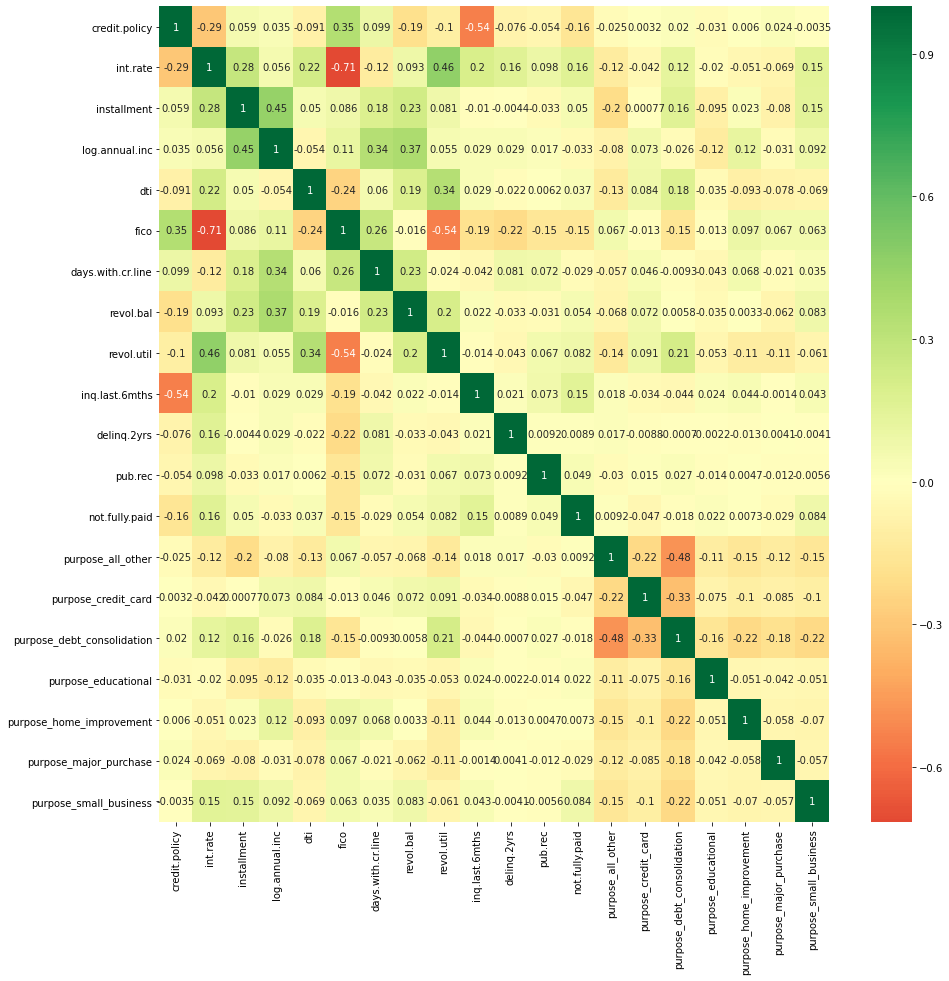

In [14]:
# Let's check the multicollinearity of features by checking the correlation matric

plt.figure(figsize=(15,15))
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',center=0) 

## 6. Model Building

In [15]:
# Train test split
X = df.drop(['not.fully.paid'], axis = 1)
y = df['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=500)

## Decision Tree with criterion = gini

In [16]:
clf = DecisionTreeClassifier(criterion='gini',random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Confusion Matrix : \n ",confusion_matrix(y_test, y_pred))
print("\n Accuracy Score : \n ",accuracy_score(y_test,y_pred))
print("\n Classification Report : \n",classification_report(y_test, y_pred))

Confusion Matrix : 
  [[2018  374]
 [ 369  113]]

 Accuracy Score : 
  0.7414752957550452

 Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      2392
           1       0.23      0.23      0.23       482

    accuracy                           0.74      2874
   macro avg       0.54      0.54      0.54      2874
weighted avg       0.74      0.74      0.74      2874



## Decision Tree with criterion = entropy

In [17]:
clf = DecisionTreeClassifier(criterion='entropy',random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Confusion Matrix : \n ",confusion_matrix(y_test, y_pred))
print("\n Accuracy Score : \n ",accuracy_score(y_test,y_pred))
print("\n Classification Report : \n",classification_report(y_test, y_pred))

Confusion Matrix : 
  [[2034  358]
 [ 396   86]]

 Accuracy Score : 
  0.7376478775226165

 Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.85      0.84      2392
           1       0.19      0.18      0.19       482

    accuracy                           0.74      2874
   macro avg       0.52      0.51      0.51      2874
weighted avg       0.73      0.74      0.73      2874



## Handle class imbalance

The class 1 is very less, hence we need to handle the class imbalance by oversampling

In [19]:
# Handle class imbalance
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)


# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_ros,y_ros,test_size=0.3,random_state=500)


## Decision Tree with criterion = gini 

In [20]:
clf = DecisionTreeClassifier(criterion='gini',random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Confusion Matrix : \n ",confusion_matrix(y_test, y_pred))
print("\n Accuracy Score : \n ",accuracy_score(y_test,y_pred))
print("\n Classification Report : \n",classification_report(y_test, y_pred))

Confusion Matrix : 
  [[2018  470]
 [  33 2306]]

 Accuracy Score : 
  0.8957944893308473

 Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.81      0.89      2488
           1       0.83      0.99      0.90      2339

    accuracy                           0.90      4827
   macro avg       0.91      0.90      0.90      4827
weighted avg       0.91      0.90      0.90      4827



## Decision Tree with criterion = entropy

In [21]:
clf = DecisionTreeClassifier(criterion='entropy',random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Confusion Matrix : \n ",confusion_matrix(y_test, y_pred))
print("\n Accuracy Score : \n ",accuracy_score(y_test,y_pred))
print("\n Classification Report : \n",classification_report(y_test, y_pred))
clf

Confusion Matrix : 
  [[2017  471]
 [  32 2307]]

 Accuracy Score : 
  0.8957944893308473

 Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.81      0.89      2488
           1       0.83      0.99      0.90      2339

    accuracy                           0.90      4827
   macro avg       0.91      0.90      0.90      4827
weighted avg       0.91      0.90      0.90      4827



DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

## Grid Search

In [22]:
dtclassifier = DecisionTreeClassifier()

# defining parameter range 
param_grid = {'criterion': ['gini', 'entropy'],  
              'max_depth': [10,15,20,30,40,50]}  
  
grid = GridSearchCV(dtclassifier, param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)

C:\Users\kaart\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] criterion=gini, max_depth=10 ....................................
[CV] ........ criterion=gini, max_depth=10, score=0.670, total=   0.0s
[CV] criterion=gini, max_depth=10 ....................................
[CV] ........ criterion=gini, max_depth=10, score=0.693, total=   0.0s
[CV] criterion=gini, max_depth=10 ....................................
[CV] ........ criterion=gini, max_depth=10, score=0.675, total=   0.0s
[CV] criterion=gini, max_depth=15 ....................................
[CV] ........ criterion=gini, max_depth=15, score=0.771, total=   0.0s
[CV] criterion=gini, max_depth=15 ....................................
[CV] ........ criterion=gini, max_depth=15, score=0.753, total=   0.1s
[CV] criterion=gini, max_depth=15 ....................................
[CV] ........ criterion=gini, max_depth=15, score=0.769, total=   0.0s
[CV] criterion=gini, max_depth=20 ....................................
[CV] ........ cr

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    2.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 30, 40, 50]},
       

In [23]:
# Best parameter after hyper parameter tuning 
print(grid.best_params_) 
  
# Moel Parameters 
print(grid.best_estimator_)

{'criterion': 'entropy', 'max_depth': 40}
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=40,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [24]:
# Prediction using best parameters
grid_predictions = grid.predict(X_test) 
  
# print classification report 
print("Confusion Matrix : \n ",confusion_matrix(y_test, grid_predictions))
print("\n Accuracy Score : \n ",accuracy_score(y_test,grid_predictions))
print("\n Classification Report : \n",classification_report(y_test, grid_predictions))

Confusion Matrix : 
  [[2020  468]
 [  36 2303]]

 Accuracy Score : 
  0.8955873213175886

 Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.81      0.89      2488
           1       0.83      0.98      0.90      2339

    accuracy                           0.90      4827
   macro avg       0.91      0.90      0.90      4827
weighted avg       0.91      0.90      0.90      4827

